# Exploratory Data Analysis for Fiber Orientation

This notebook focuses on exploring and understanding our datasets:
1. Biological fiber images
2. Diffusion fiber images

We'll analyze the distribution of angles, dataset characteristics, and data quality aspects.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## 1. Data Loading

In [2]:
# Load biological data
bio_file_dir = "../images/bio/"
bio_csv_dir = "../images/bio/labels.csv"

bio_df = pd.read_csv(bio_csv_dir)
bio_df = bio_df.dropna()
bio_df = bio_df.reset_index(drop=True)
bio_df['img_dir'] = bio_df['filename'].apply(lambda x: os.path.join(bio_file_dir, x))

print("Biological Dataset Shape:", bio_df.shape)
print("\nSample of biological data:")
bio_df.head()

Biological Dataset Shape: (673, 3)

Sample of biological data:


,filename,angle,img_dir
0,1.png,47,../images/bio/1.png
1,2.png,48,../images/bio/2.png
2,3.png,59,../images/bio/3.png
3,4.png,36,../images/bio/4.png
4,5.png,58,../images/bio/5.png


In [3]:
# Load diffusion data
diff_file_dir = "../images/diffusion/"
diff_csv_dir = "../images/diffusion/labels.csv"

diff_df = pd.read_csv(diff_csv_dir)
diff_df = diff_df.dropna()
diff_df = diff_df.reset_index(drop=True)
diff_df['img_dir'] = diff_df['filename'].apply(lambda x: os.path.join(diff_file_dir, x))

print("Diffusion Dataset Shape:", diff_df.shape)
print("\nSample of diffusion data:")
diff_df.head()

Diffusion Dataset Shape: (609, 3)

Sample of diffusion data:


,filename,angle,img_dir
0,2001.png,109,../images/diffusion/2001.png
1,2002.png,138,../images/diffusion/2002.png
2,2003.png,124,../images/diffusion/2003.png
3,2004.png,138,../images/diffusion/2004.png
4,2005.png,77,../images/diffusion/2005.png


## 2. Angle Distribution Analysis

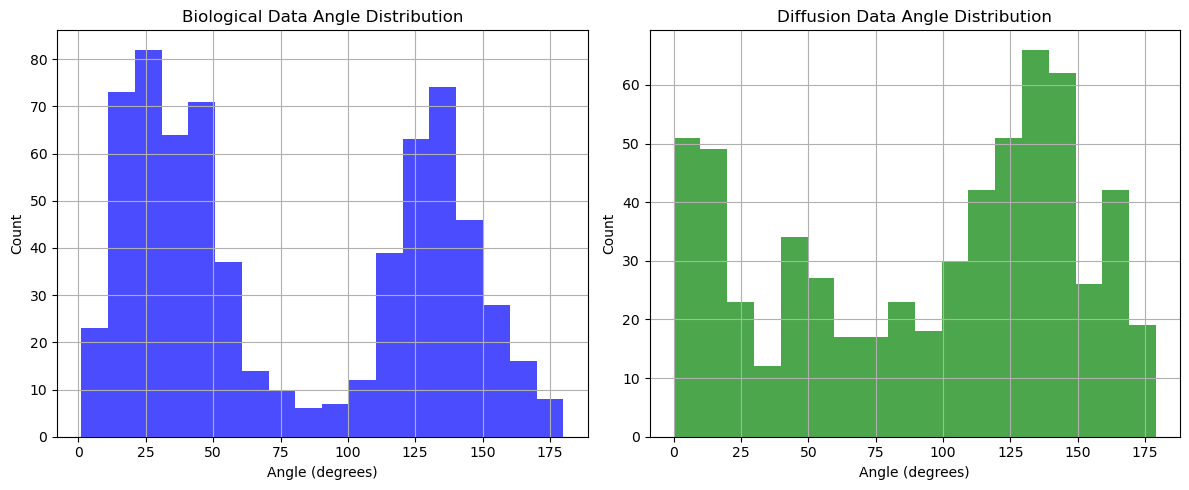


Angle Statistics:
Biological Data:
count    673.000000
mean      78.227340
std       52.745828
min        1.000000
25%       30.000000
50%       56.000000
75%      131.000000
max      180.000000
Name: angle, dtype: float64

Diffusion Data:
count    609.000000
mean      93.942529
std       54.149965
min        0.000000
25%       46.000000
50%      110.000000
75%      139.000000
max      179.000000
Name: angle, dtype: float64


In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bio_df['angle'], bins=18, color='blue', alpha=0.7)
plt.title('Biological Data Angle Distribution')
plt.xlabel('Angle (degrees)')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(diff_df['angle'], bins=18, color='green', alpha=0.7)
plt.title('Diffusion Data Angle Distribution')
plt.xlabel('Angle (degrees)')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nAngle Statistics:")
print("Biological Data:")
print(bio_df['angle'].describe())
print("\nDiffusion Data:")
print(diff_df['angle'].describe())

## 3. Image Characteristics

In [5]:
def analyze_image(img_path):
    """Analyze basic characteristics of a grayscale image"""
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    return {
        'size': img.size,
        'min': np.min(img_array),
        'max': np.max(img_array),
        'mean': np.mean(img_array),
        'std': np.std(img_array),
        'median': np.median(img_array)
    }

# Analyze first few images from each dataset
print("Biological Images Analysis:")
for i in range(min(3, len(bio_df))):
    stats = analyze_image(bio_df['img_dir'].iloc[i])
    print(f"\nImage {i+1}:")
    for key, value in stats.items():
        print(f"{key}: {value}")

print("\nDiffusion Images Analysis:")
for i in range(min(3, len(diff_df))):
    stats = analyze_image(diff_df['img_dir'].iloc[i])
    print(f"\nImage {i+1}:")
    for key, value in stats.items():
        print(f"{key}: {value}")

Biological Images Analysis:

Image 1:
size: (50, 50)
min: 3
max: 83
mean: 22.3736
std: 12.098050381776398
median: 20.0

Image 2:
size: (50, 50)
min: 4
max: 72
mean: 21.0304
std: 8.990209999771974
median: 19.0

Image 3:
size: (50, 50)
min: 3
max: 68
mean: 22.2488
std: 9.586850294022536
median: 21.0

Diffusion Images Analysis:

Image 1:
size: (50, 50)
min: 32
max: 199
mean: 77.4556
std: 31.75264443538522
median: 69.0

Image 2:
size: (50, 50)
min: 36
max: 187
mean: 80.486
std: 36.53930765627614
median: 71.0

Image 3:
size: (50, 50)
min: 43
max: 191
mean: 82.8096
std: 35.26696680804858
median: 74.0


## 4. Sample Image Visualization

Sample Biological Images:


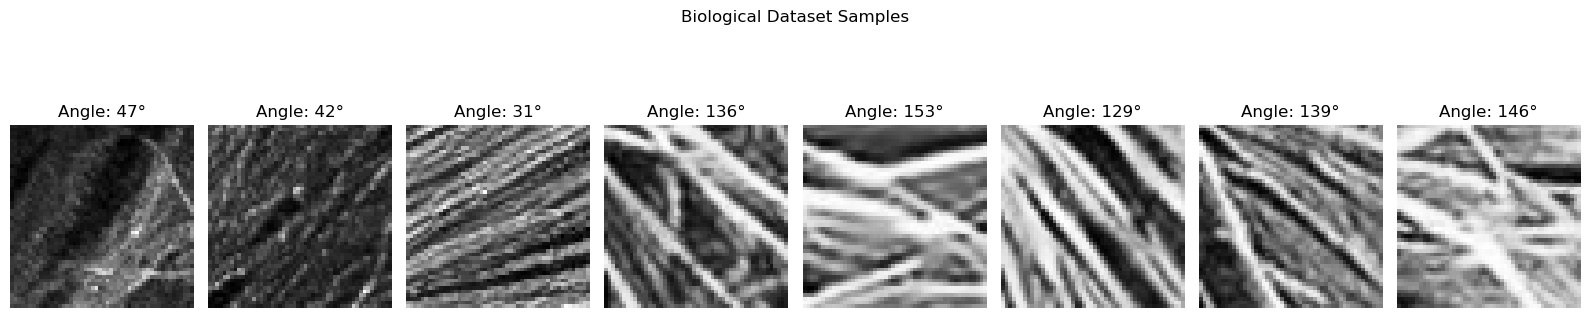


Sample Diffusion Images:


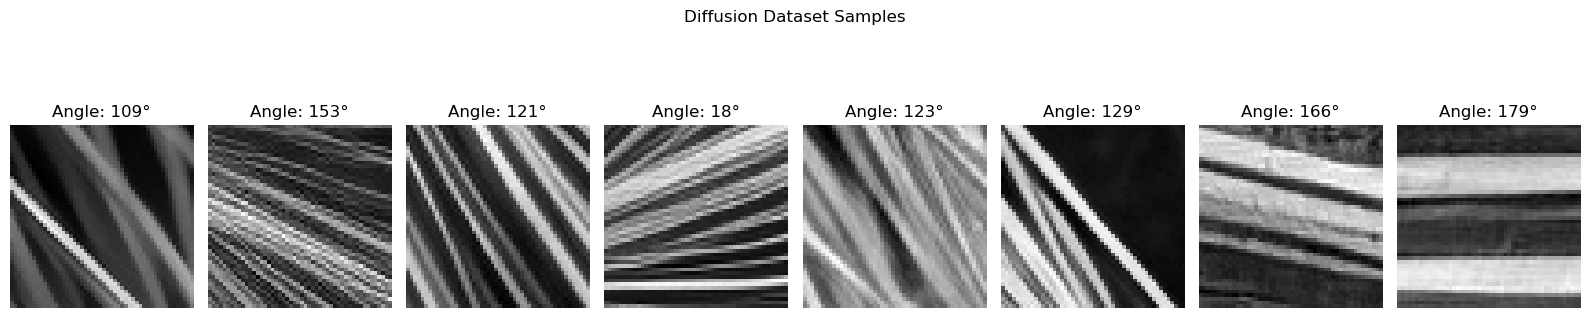

In [12]:
def plot_sample_images(df, num_samples=3, title="Sample Images"):
    """Plot sample images with their angles from a DataFrame"""
    fig, axes = plt.subplots(1, num_samples, figsize=(16, 4))
    
    indices = np.linspace(0, len(df)-1, num_samples, dtype=int)
    for i, idx in enumerate(indices):
        img = Image.open(df['img_dir'].iloc[idx]).convert('L')
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Angle: {df["angle"].iloc[idx]}°')
        axes[i].axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

print("Sample Biological Images:")
plot_sample_images(bio_df, num_samples=8, title="Biological Dataset Samples")

print("\nSample Diffusion Images:")
plot_sample_images(diff_df, num_samples=8, title="Diffusion Dataset Samples")

## 5. Dataset Balance Analysis

Dataset Balance Analysis (10° bins):

Biological Data Balance:
min_samples: 6.00
max_samples: 79.00
mean_samples: 37.39
std_samples: 26.62
total_samples: 673.00

Diffusion Data Balance:
min_samples: 12.00
max_samples: 66.00
mean_samples: 33.83
std_samples: 16.08
total_samples: 609.00


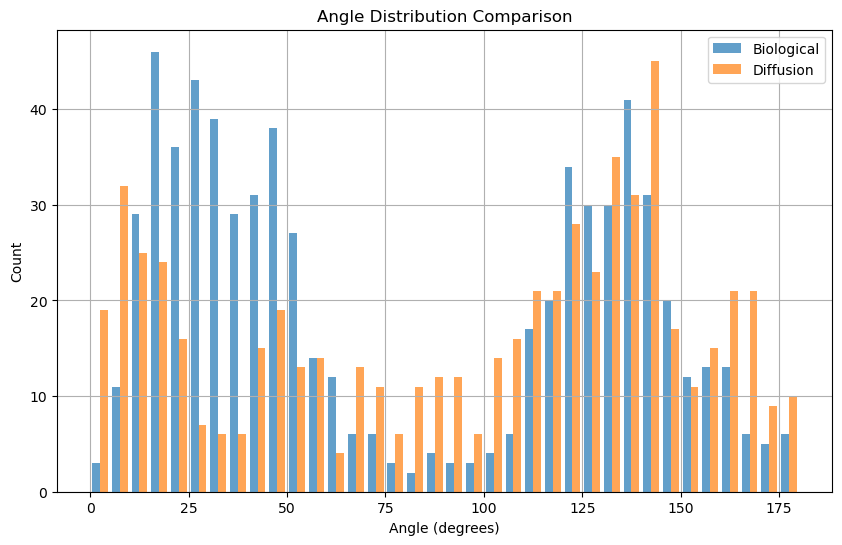

In [14]:
def analyze_angle_distribution(angles, bin_size=10):
    """Analyze the distribution of angles in different bins"""
    bins = np.arange(0, 181, bin_size)
    hist, _ = np.histogram(angles, bins=bins)
    return {
        'min_samples': np.min(hist),
        'max_samples': np.max(hist),
        'mean_samples': np.mean(hist),
        'std_samples': np.std(hist),
        'total_samples': len(angles),
    }

print("Dataset Balance Analysis (10° bins):")
print("\nBiological Data Balance:")
bio_stats = analyze_angle_distribution(bio_df['angle'])
for key, value in bio_stats.items():
    print(f"{key}: {value:.2f}")

print("\nDiffusion Data Balance:")
diff_stats = analyze_angle_distribution(diff_df['angle'])
for key, value in diff_stats.items():
    print(f"{key}: {value:.2f}")

# Plot angle distributions together
plt.figure(figsize=(10, 6))
plt.hist([bio_df['angle'], diff_df['angle']], 
         bins=36, 
         label=['Biological', 'Diffusion'],
         alpha=0.7)
plt.title('Angle Distribution Comparison')
plt.xlabel('Angle (degrees)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()